#Uvod u znanost o podacima (UZOP) - Projekt - Treci dio -  Early Predictor for Student Success Based on 
Behavioural and Demographical Indicators 

In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import numpy as np
plt.rcParams["figure.figsize"] = (6, 4)

The dataset consists of 7 tables: assessments.csv, courses.csv, studentAssessment.csv, studentInfo.csv, studentRegistration.csv, studentVle.csv and vle.csv.
Lets take a look at them one by one.

1. assessments.csv

In [131]:
assessments = pd.read_csv("assessments.csv")
print(assessments.isna().sum())
print(assessments.describe())
print(f"Shape: {assessments.shape}")
assessments.head(8)

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64
       id_assessment        date      weight
count     206.000000  195.000000  206.000000
mean    26473.975728  145.005128   20.873786
std     10098.625521   76.001119   30.384224
min      1752.000000   12.000000    0.000000
25%     15023.250000   71.000000    0.000000
50%     25364.500000  152.000000   12.500000
75%     34891.750000  222.000000   24.250000
max     40088.000000  261.000000  100.000000
Shape: (206, 6)


,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
5,AAA,2013J,1757,Exam,NaN,100.0
6,AAA,2014J,1758,TMA,19.0,10.0
7,AAA,2014J,1759,TMA,54.0,20.0


This table is a list of all assessments throughout modules. Each module has multiple assessments and is repeated yearly.
Exams are the only type of assessment which doesn't have a date. Also date looks like to be a rising numerical value, 
more specifically, number of days since module started (I suppose so). Weight is the percentage of total score of a module.

2. courses.csv

In [132]:
courses = pd.read_csv("courses.csv")
print(courses.isna().sum())
print(courses.describe())
print(f"Shape: {courses.shape}")
courses.head(8)

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64
       module_presentation_length
count                   22.000000
mean                   255.545455
std                     13.654677
min                    234.000000
25%                    241.000000
50%                    261.500000
75%                    268.000000
max                    269.000000
Shape: (22, 3)


,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241


This table has a composite key, code_module and code_presentation, or in other words, module and its group and year of conduct.

3. student_info.csv

In [133]:
# studentInfo.csv

student_info = pd.read_csv("studentInfo.csv")
print(student_info.isna().sum())
print(student_info.describe())
print(f"Shape: {student_info.shape}")
student_info.head()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64
         id_student  num_of_prev_attempts  studied_credits
count  3.259300e+04          32593.000000     32593.000000
mean   7.066877e+05              0.163225        79.758691
std    5.491673e+05              0.479758        41.071900
min    3.733000e+03              0.000000        30.000000
25%    5.085730e+05              0.000000        60.000000
50%    5.903100e+05              0.000000        60.000000
75%    6.444530e+05              0.000000       120.000000
max    2.716795e+06              6.000000       655.000000
Shape: (32593, 12)


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


This table is perhaps the "main" one. Why? Since the project itself is "Early Predictor for Student Success Based on Behavioural and Demographical Indicators", what we are actually trying to predict is the "final_result" variable. 

It has a composite key of code_module, code_presentation and id_student. Rows represent students' attempts on different modules.

This table has some particularly interesting columns for an early predictor project like *disability, imd_band (IMD = Index of Multiple Deprivation), age_band, highest_education, region and gender*. All of these are demographical indicators. Note that we have some missing *imd_band* values.

Let's visualize some of this data.

Text(0, 0.5, 'Number of attempts')

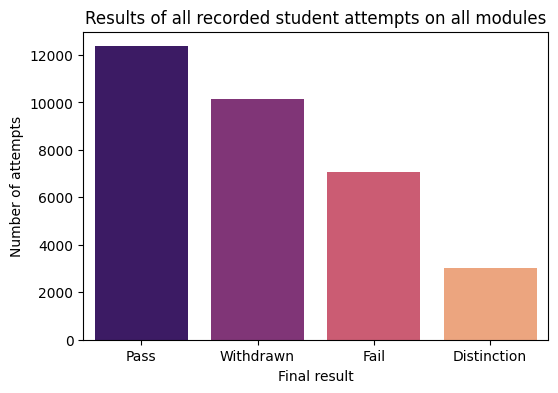

In [134]:
sns.countplot(x="final_result", data=student_info, palette="magma")
plt.title("Results of all recorded student attempts on all modules")
plt.xlabel("Final result")
plt.ylabel("Number of attempts")    

4. studentAssessment.csv

In [135]:
# studentAssessment.csv

student_assessment = pd.read_csv("studentAssessment.csv")
print(student_assessment.isna().sum())
print(student_assessment.describe())
print(f"Shape: {student_assessment.shape}")
student_assessment.head()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64
       id_assessment    id_student  date_submitted      is_banked  \
count  173912.000000  1.739120e+05   173912.000000  173912.000000   
mean    26553.803556  7.051507e+05      116.032942       0.010977   
std      8829.784254  5.523952e+05       71.484148       0.104194   
min      1752.000000  6.516000e+03      -11.000000       0.000000   
25%     15022.000000  5.044290e+05       51.000000       0.000000   
50%     25359.000000  5.852080e+05      116.000000       0.000000   
75%     34883.000000  6.344980e+05      173.000000       0.000000   
max     37443.000000  2.698588e+06      608.000000       1.000000   

               score  
count  173739.000000  
mean       75.799573  
std        18.798107  
min         0.000000  
25%        65.000000  
50%        80.000000  
75%        90.000000  
max       100.000000  
Shape: (173912, 5)


,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


This table has a composite key too, id_assessment and id_student. It tracks all students' scores on all assessments. For and early "pre-enrollment" this data is not useful, however, we can make an early "post-enrollment" prediction by taking first recorded score for each student. We can do that by grouping the table by id_student and filtering rows with the minimum date_submitted, and then just extract the score. 

In [136]:
# Identify the first assessment for each course/module
first_assessments = assessments.loc[assessments.groupby(['code_module', 'code_presentation'])['date'].idxmin()]
first_assessment_ids = first_assessments['id_assessment']

# Filter the studentAssessment data to include only scores for the first assessments
student_assessment_filtered = student_assessment[student_assessment['id_assessment'].isin(first_assessment_ids)]

# Select the first attempt for each student on those assessments
student_assessment_filtered = student_assessment_filtered.loc[
    student_assessment_filtered.groupby('id_student')['date_submitted'].idxmin()
]

# Keep only the relevant columns for merging
student_assessment_filtered = student_assessment_filtered[['id_student', 'score']]

# Output summary
print(student_assessment_filtered.nunique())
print(student_assessment_filtered.shape)
student_assessment_filtered.head()


id_student    23046
score            97
dtype: int64
(23046, 2)


,id_student,score
1756,6516,60.0
88494,8462,93.0
0,11391,78.0
3285,23629,67.0
58648,23698,78.0


And now we have first score recorded for each student.

<AxesSubplot:ylabel='score'>

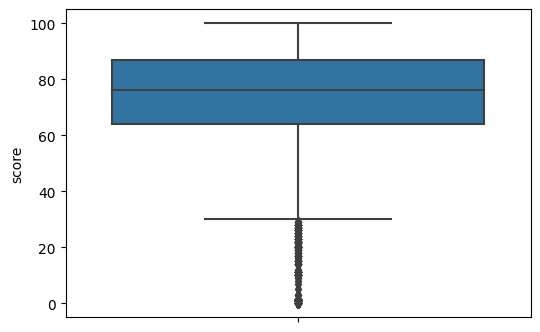

In [137]:
sns.boxplot(student_assessment_filtered, y = "score")

First scores distribution is skewed to the right with a lot of outliers to the left.

5. studentRegistration.csv

In [138]:
# studentRegistration.csv

student_registration = pd.read_csv("studentRegistration.csv")
print(student_registration.isna().sum())
print(student_registration.describe())
print(f"Shape: {student_registration.shape}")
student_registration.head()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64
         id_student  date_registration  date_unregistration
count  3.259300e+04       32548.000000         10072.000000
mean   7.066877e+05         -69.411300            49.757645
std    5.491673e+05          49.260522            82.460890
min    3.733000e+03        -322.000000          -365.000000
25%    5.085730e+05        -100.000000            -2.000000
50%    5.903100e+05         -57.000000            27.000000
75%    6.444530e+05         -29.000000           109.000000
max    2.716795e+06         167.000000           444.000000
Shape: (32593, 5)


,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


6. studentVle.csv

In [139]:
# studentVle.csv

student_vle = pd.read_csv("studentVle.csv")
print(student_vle.isna().sum())
print(student_vle.describe())
print(f"Shape: {student_vle.shape}")
student_vle.head()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64
         id_student       id_site          date     sum_click
count  1.065528e+07  1.065528e+07  1.065528e+07  1.065528e+07
mean   7.333336e+05  7.383234e+05  9.517400e+01  3.716946e+00
std    5.827060e+05  1.312196e+05  7.607130e+01  8.849047e+00
min    6.516000e+03  5.267210e+05 -2.500000e+01  1.000000e+00
25%    5.077430e+05  6.735190e+05  2.500000e+01  1.000000e+00
50%    5.882360e+05  7.300690e+05  8.600000e+01  2.000000e+00
75%    6.464840e+05  8.770300e+05  1.560000e+02  3.000000e+00
max    2.698588e+06  1.049562e+06  2.690000e+02  6.977000e+03
Shape: (10655280, 6)


,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


This table tracks students' interactions and activity within the Virtual Learning Environment (VLE). Specifically date of the interaction, site (resource) and total munber of interactions with that resource (sum_click). It has a composite key of code_module, code_presentation, id_student and id_site.

Date is relative to when the course starts (majority of resources are available all the time), so some rows have negative date values. We can use those rows for an early predictor.

In [140]:
student_vle_filtered = student_vle[student_vle["date"] < 0]
student_vle_filtered = student_vle_filtered.groupby('id_student')['sum_click'].sum().reset_index()
print(student_vle_filtered.nunique())
print(student_vle_filtered.shape)
student_vle_filtered.head()

id_student    21411
sum_click       872
dtype: int64
(21411, 2)


,id_student,sum_click
0,6516,256
1,8462,81
2,11391,98
3,23629,14
4,23698,181


<AxesSubplot:ylabel='sum_click'>

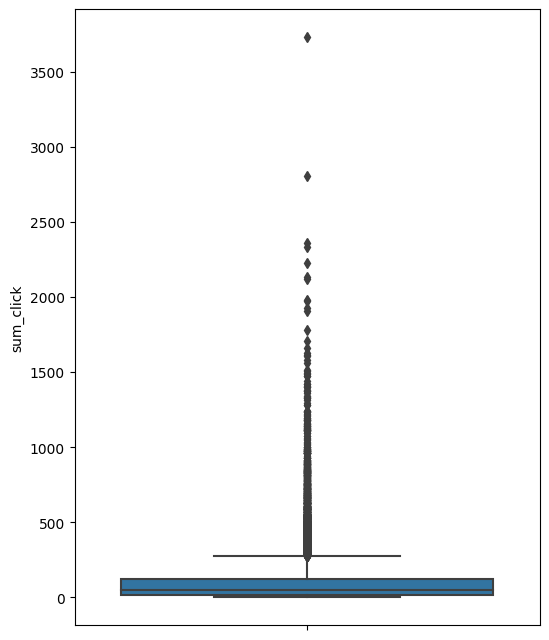

In [141]:
plt.rcParams["figure.figsize"] = (6, 8)
sns.boxplot(student_vle_filtered, y = "sum_click")

Data is extremely skewed. We know that we want those outliers because they are important for correctly classifying students who passed.

7. vle.csv

In [142]:
# vle.csv

vle = pd.read_csv("vle.csv")
print(vle.isna().sum())
print(vle.describe())
print(f"Shape: {vle.shape}")
vle.head()

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64
            id_site    week_from      week_to
count  6.364000e+03  1121.000000  1121.000000
mean   7.260991e+05    15.204282    15.214987
std    1.283151e+05     8.792865     8.779806
min    5.267210e+05     0.000000     0.000000
25%    6.615928e+05     8.000000     8.000000
50%    7.300965e+05    15.000000    15.000000
75%    8.140162e+05    22.000000    22.000000
max    1.077905e+06    29.000000    29.000000
Shape: (6364, 6)


,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN


This table has key id_site, and it represents information about the site, its module and presentation, activity_type, starting and ending dates. NaN probably indicates that resource remamins available throughout the entire duration of a given module. This table doesn't have any interesting data.

And that is all the data, majority of important features are in studentInfo.csv. From other tables we want date_registration (studentRegistration.csv), sum_click (extracted from studentVle.csv) and first assignment score (extracted from studentRegistration.csv). Lets start by merging all the data.

In [143]:
student_info = student_info.dropna() # Droping rows with missing values (some imd_band values missing)
student_info = student_info.drop("region", axis=1) # Droping region
student_registration = student_registration.drop("date_unregistration", axis=1) # Droping this column as it has mostly NaN values 
                                                                                # (and probably not that important data)
student_registration = student_registration.dropna()                                                                     

In [144]:
reg_info = pd.merge(student_registration, student_info, on=["code_module", "code_presentation" , "id_student"]) # Merging by shared key   
print(reg_info.shape)
reg_info.head()

(31437, 12)


,code_module,code_presentation,id_student,date_registration,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,-159.0,M,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,-53.0,F,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,-92.0,F,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,-52.0,F,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,-176.0,F,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [145]:

# Perform an outer join with reg_info as the left table
reg_info_2 = pd.merge(reg_info, student_vle_filtered, on="id_student", how="left")

# Replace NaN values in the sum of clicks column with 0
reg_info_2['sum_click'] = reg_info_2['sum_click'].fillna(0)

reg_info_2.head()

,code_module,code_presentation,id_student,date_registration,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click
0,AAA,2013J,11391,-159.0,M,HE Qualification,90-100%,55<=,0,240,N,Pass,98.0
1,AAA,2013J,28400,-53.0,F,HE Qualification,20-30%,35-55,0,60,N,Pass,215.0
2,AAA,2013J,30268,-92.0,F,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,102.0
3,AAA,2013J,31604,-52.0,F,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,169.0
4,AAA,2013J,32885,-176.0,F,Lower Than A Level,50-60%,0-35,0,60,N,Pass,295.0


In [146]:
reg_info_3 = pd.merge(reg_info_2, student_assessment_filtered, on="id_student", how="left")

reg_info_3['score'] = reg_info_3['score'].fillna(0)

reg_info_3.head()

,code_module,code_presentation,id_student,date_registration,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score
0,AAA,2013J,11391,-159.0,M,HE Qualification,90-100%,55<=,0,240,N,Pass,98.0,78.0
1,AAA,2013J,28400,-53.0,F,HE Qualification,20-30%,35-55,0,60,N,Pass,215.0,70.0
2,AAA,2013J,30268,-92.0,F,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,102.0,0.0
3,AAA,2013J,31604,-52.0,F,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,169.0,72.0
4,AAA,2013J,32885,-176.0,F,Lower Than A Level,50-60%,0-35,0,60,N,Pass,295.0,69.0


In [147]:
# Convert ordinal features into binary (dichotomous) features
data = reg_info_3.copy()

'''
# Use pandas get_dummies to create binary columns for each category
education_dummies = pd.get_dummies(data['highest_education'], prefix='highest_education')
#imd_dummies = pd.get_dummies(data['imd_band'], prefix='imd_band')
age_dummies = pd.get_dummies(data['age_band'], prefix='age_band')
'''

data['age_band'] = data['age_band'].map({'0-35': 0, '35-55': 1, '55<=': 2})

'''
data['imd_band'] = data['imd_band'].map({'0-10%': 0, '10-20': 1, '20-30%': 2, '30-40%': 3, 
                                         '40-50%': 4, '50-60%': 5, '60-70%': 6, 
                                         '70-80%': 7, '80-90%': 8, '90-100%': 9})
'''

education_mapping = {
    'No Formal quals': 0,
    'Lower Than A Level': 1,
    'A Level or Equivalent': 2,
    'HE Qualification': 3,
    'Post Graduate Qualification': 4
}

data['highest_education'] = data['highest_education'].map(education_mapping)


'''
# Combine the original data with the new binary columns
data = pd.concat([data, education_dummies, age_dummies], axis=1)
'''

data = data.drop(columns=['imd_band'])


# Display the resulting dataset structure
data.head()


,code_module,code_presentation,id_student,date_registration,gender,highest_education,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score
0,AAA,2013J,11391,-159.0,M,3,2,0,240,N,Pass,98.0,78.0
1,AAA,2013J,28400,-53.0,F,3,1,0,60,N,Pass,215.0,70.0
2,AAA,2013J,30268,-92.0,F,2,1,0,60,Y,Withdrawn,102.0,0.0
3,AAA,2013J,31604,-52.0,F,2,1,0,60,N,Pass,169.0,72.0
4,AAA,2013J,32885,-176.0,F,1,0,0,60,N,Pass,295.0,69.0


In [148]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder() # Label encoding binary categorical features

data['gender'] = label_encoder.fit_transform(data['gender'])
data['disability'] = label_encoder.fit_transform(data['disability'])

data.head()


,code_module,code_presentation,id_student,date_registration,gender,highest_education,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,score
0,AAA,2013J,11391,-159.0,1,3,2,0,240,0,Pass,98.0,78.0
1,AAA,2013J,28400,-53.0,0,3,1,0,60,0,Pass,215.0,70.0
2,AAA,2013J,30268,-92.0,0,2,1,0,60,1,Withdrawn,102.0,0.0
3,AAA,2013J,31604,-52.0,0,2,1,0,60,0,Pass,169.0,72.0
4,AAA,2013J,32885,-176.0,0,1,0,0,60,0,Pass,295.0,69.0


In [149]:
data = data.drop(columns=["id_student", "code_presentation", "code_module", "studied_credits"]) # Droping monotone and non-informative features (code_module could be but we are omitting it for now)
data.head()

,date_registration,gender,highest_education,age_band,num_of_prev_attempts,disability,final_result,sum_click,score
0,-159.0,1,3,2,0,0,Pass,98.0,78.0
1,-53.0,0,3,1,0,0,Pass,215.0,70.0
2,-92.0,0,2,1,0,1,Withdrawn,102.0,0.0
3,-52.0,0,2,1,0,0,Pass,169.0,72.0
4,-176.0,0,1,0,0,0,Pass,295.0,69.0


In [150]:
#data['final_result'] = data['final_result'].map({'Pass': 1, 'Fail': 0, 'Withdrawn': 2, 'Distinction': 3})
X = data.drop(columns=['final_result'])
y = data['final_result']
#print(X.head())
#print(y.head())

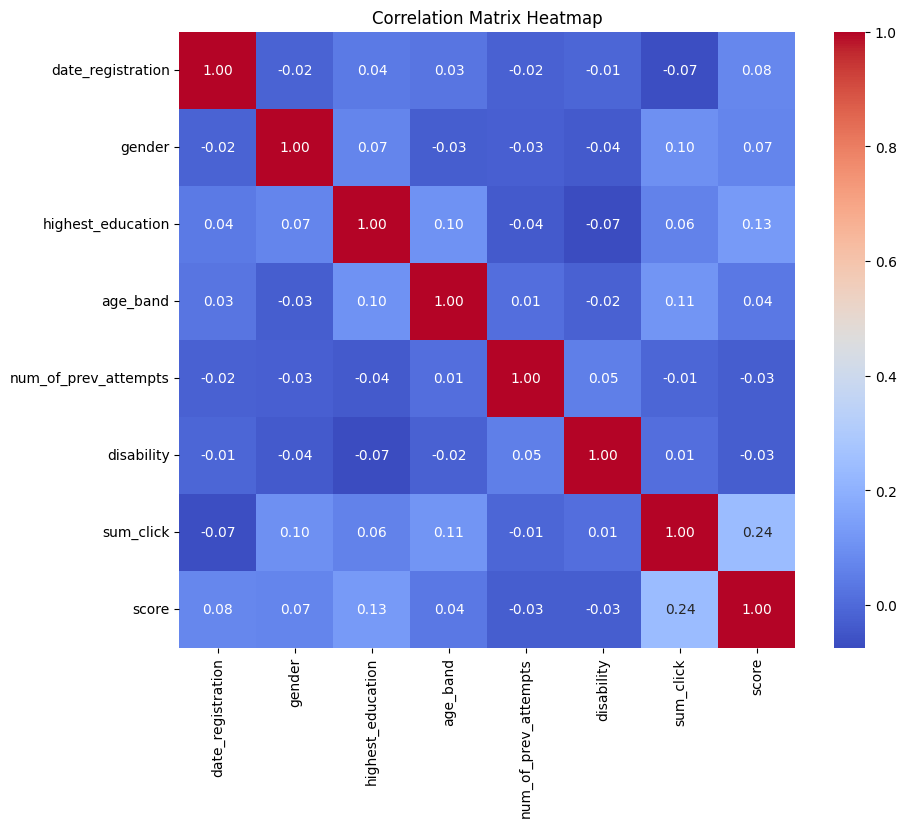

In [151]:
# Correlation matrix
cor_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [152]:
data.describe()

,date_registration,gender,highest_education,age_band,num_of_prev_attempts,disability,sum_click,score
count,31437.000000,31437.000000,31437.000000,31437.000000,31437.000000,31437.000000,31437.000000,31437.000000
mean,-69.831981,0.542068,1.726914,0.298915,0.164424,0.099532,79.111747,58.008271
std,49.199856,0.498235,0.732964,0.471415,0.482322,0.299380,148.111398,34.484798
min,-322.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-101.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,39.000000
50%,-57.000000,1.000000,2.000000,0.000000,0.000000,0.000000,25.000000,70.000000
75%,-29.000000,1.000000,2.000000,1.000000,0.000000,0.000000,92.000000,84.000000
max,167.000000,1.000000,4.000000,2.000000,6.000000,1.000000,3731.000000,100.000000


In [153]:
from sklearn.model_selection import train_test_split

# 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [154]:
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize

def doRandomForest(X_train, X_test, y_train, y_test, X, y):
    fig, ax = plt.subplots(2, figsize=(8, 6))

    class_names = ["Distinction", "Fail", "Pass", "Withdrawn"]

    rf = RandomForestClassifier(class_weight='balanced').fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    y_score = rf.predict_proba(X_test)

    # Print accuracy and classification report
    print(f"Model Accuracy : {accuracy_score(y_test, y_pred_rf)}")
    print(f"\nClassification report:\n {classification_report(y_test, y_pred_rf)}")

    # Confusion matrix
    cm_rf = confusion_matrix(y_test, y_pred_rf)
    plt.sca(ax[0])
    sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

    # Compute ROC curve and AUC for each class
    fpr = {}
    tpr = {}
    roc_auc = {}

    # Convert y_test to one-hot encoding for multi-class ROC
    y_test_bin = label_binarize(y_test, classes=class_names)

    # Compute ROC curve for each class
    for i in range(y_test_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curve
    plt.sca(ax[1])
    colors = ['blue', 'red', 'green', 'orange']

    for i in range(y_test_bin.shape[1]):
        plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for no skill
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

Model Accuracy : 0.48982188295165396

Classification report:
               precision    recall  f1-score   support

 Distinction       0.29      0.14      0.19       892
        Fail       0.34      0.26      0.29      2026
        Pass       0.50      0.69      0.58      3515
   Withdrawn       0.60      0.51      0.55      2999

    accuracy                           0.49      9432
   macro avg       0.43      0.40      0.40      9432
weighted avg       0.48      0.49      0.47      9432



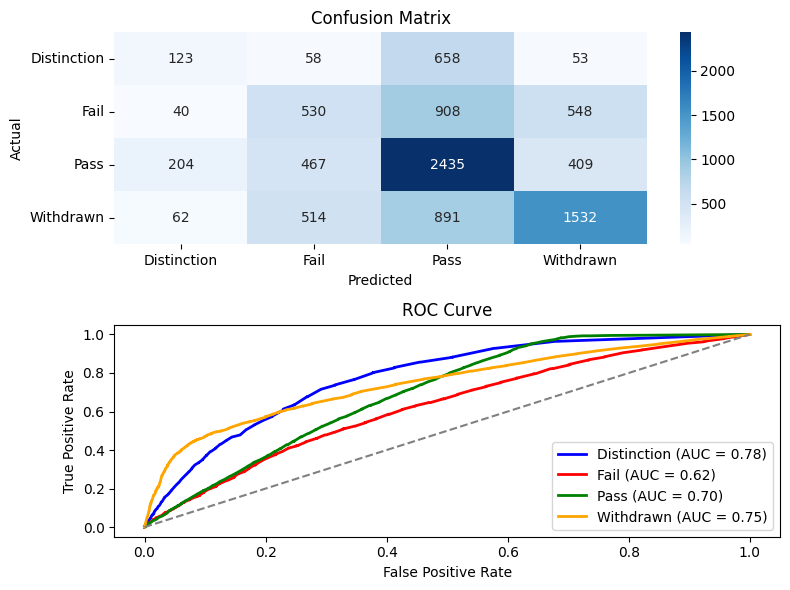

In [155]:
doRandomForest(X_train, X_test, y_train, y_test, X, y)    